In [ ]:
import import_ipynb
import Scanpy_functions_v03262021 as sc_pipe
import scvelo as scv
scv.logging.print_version()
import warnings
import scirpy as ir
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import bbknn
import logging
from sklearn.mixture import GaussianMixture
from scipy.stats     import norm
import glob
import os
import hvplot.pandas
import docx
from docx import Document
from docx.shared import Inches
from docx.shared import Pt
from scipy import sparse
import scanpy.external as sce
import holoviews as hv
import panel as pn
import bokeh
from bokeh.resources import INLINE
import scanorama
import gseapy

importing Jupyter notebook from Scanpy_functions_v03262021.ipynb
Running scvelo 0.2.5.dev5+g1805ab4 (python 3.8.12) on 2022-07-07 10:56.


In [ ]:
# define sample metadata. Usually read from a file.
exclude_genes = ['Rpl', 'Rps', 'Trav', 'Traj', 'Trbj', 'Trbv','Mrp','Fau','Dap3','Uba52','Ighv', 'Igkv', 'Iglv']


In_path = '/user/ifrec/liuyuchen/scRNASeq_DATA/Akira_Fukusima_scRNASeq/'

out_path = '/user/ifrec/liuyuchen/Analysis_Reports/Akira_Fukusima_scRNASeq/human/'

In [ ]:
#sc.set_figure_params(scanpy=True, dpi=200,  figsize=[12.8,9.6])
sc.settings.verbosity = 3

In [ ]:
scv.settings.set_figure_params("scvelo")

In [ ]:
adata = sc.read_h5ad(out_path+'/human_merged_0630.h5ad')
#mouse = sc.read_h5ad(out_path+'/mouse_labeled.h5ad')

In [ ]:
adata.obs['Sample'].value_counts()

In [ ]:
#sc.tl.leiden(adata, resolution=3,key_added='leiden_resol_3')

In [ ]:
sc.pl.umap(adata,color='leiden',legend_loc = 'on data')

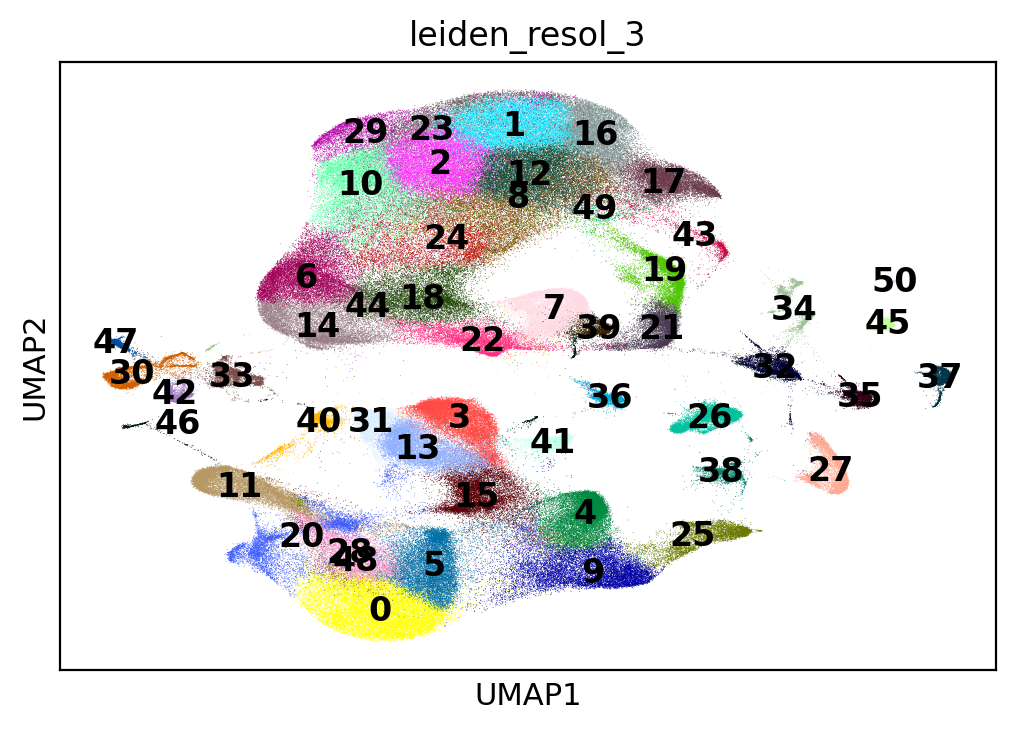

In [9]:
sc.pl.umap(adata,color='leiden_resol_3',legend_loc = 'on data')

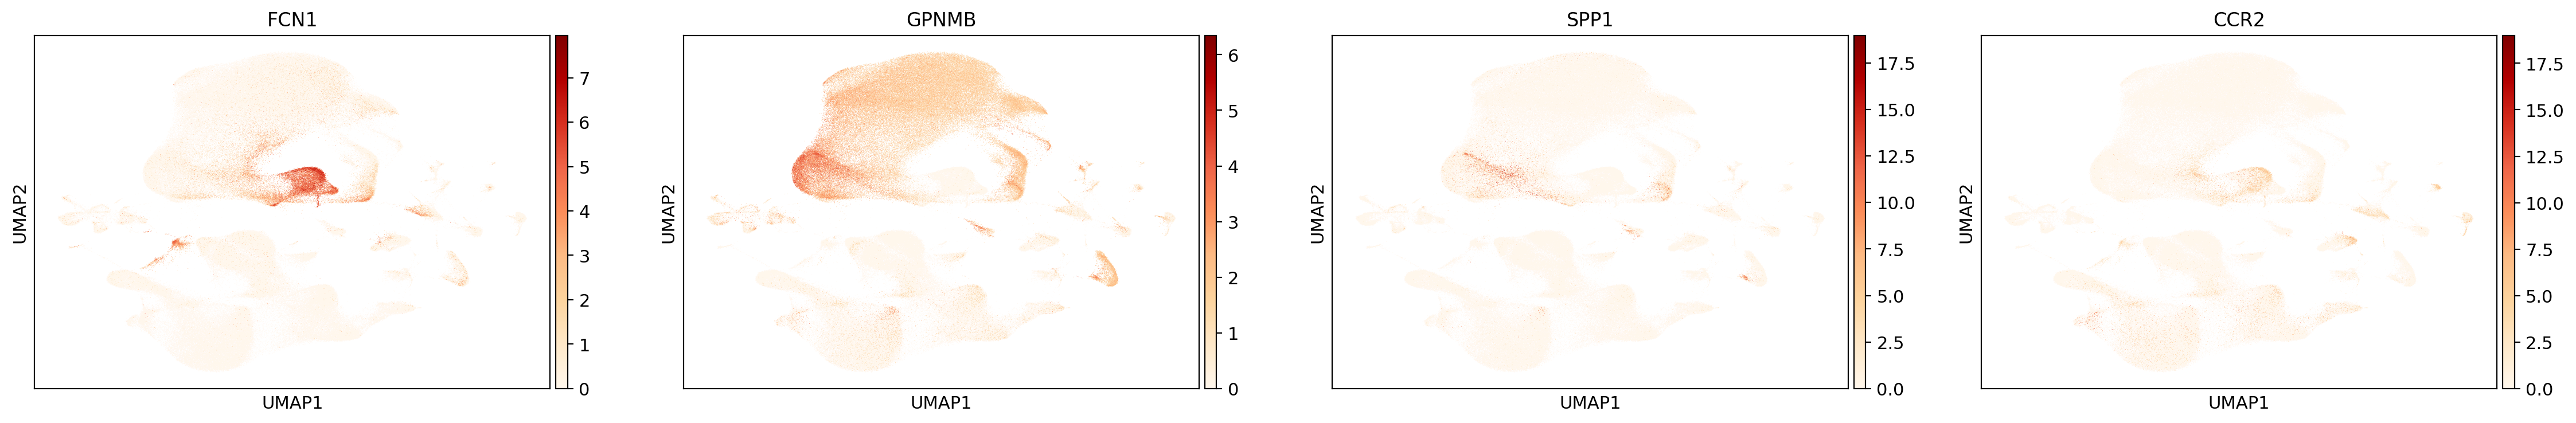

In [10]:
sc.pl.umap(adata,color=['FCN1','GPNMB','SPP1','CCR2'],cmap='OrRd',use_raw=False)

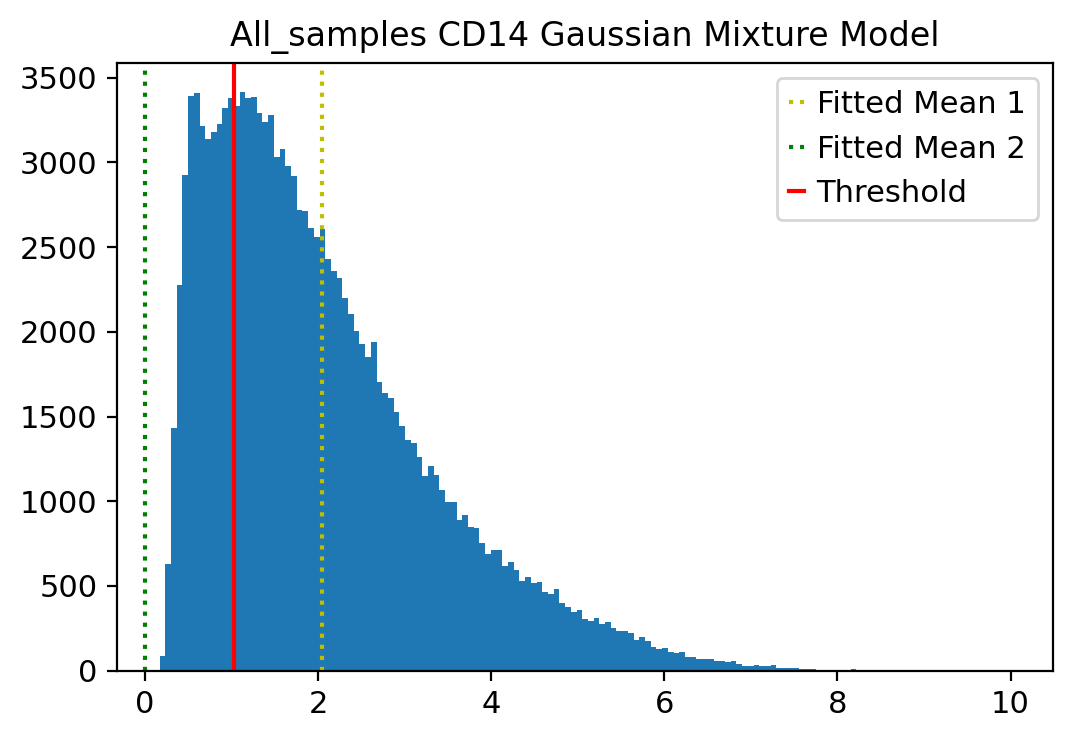

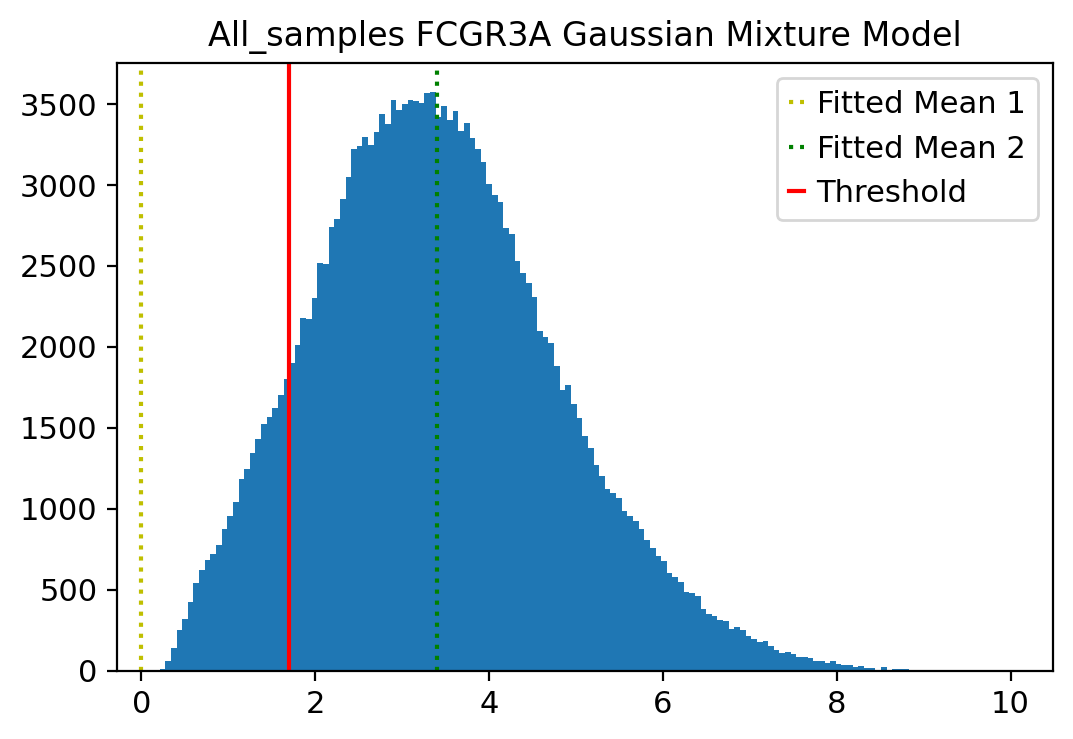

In [60]:
Factors = ['CD14', 'FCGR3A']
adata.obs['Monocyte_factors'] = 'Type_'
for f in Factors:
    delta, var, cut_off,up_bound,low_bound= sc_pipe.Thrshold_by_Gaussian_with_plot(adata, f,out_path, 'All_samples', sparse = True)
    data = adata[:, f].X.A
    data =  np.interp(data, (data.min(), data.max()), (0, 10))
    adata.obs[f+'_binary'] = np.where(data > cut_off, f+'+', f+'-')
    adata.obs['Monocyte_factors'] =adata.obs['Monocyte_factors']+'_'+adata.obs[f+'_binary']

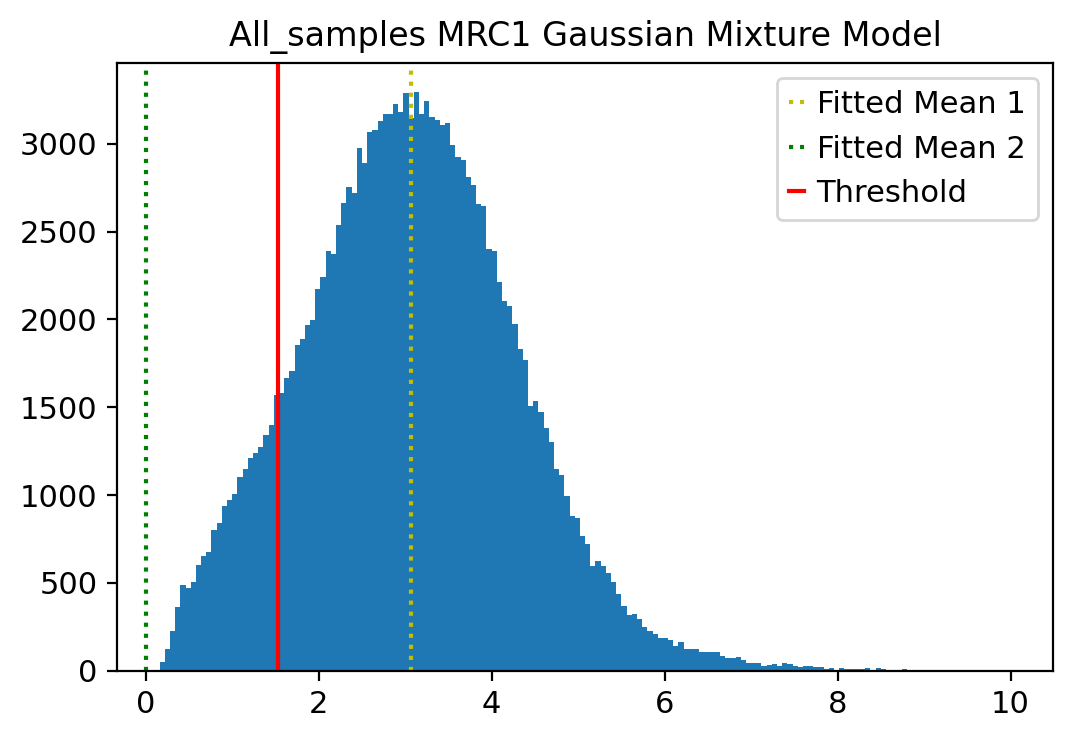

In [61]:
Factors = ['MRC1']
adata.obs['Marco'] = 'Type_'
for f in Factors:
    delta, var, cut_off,up_bound,low_bound= sc_pipe.Thrshold_by_Gaussian_with_plot(adata, f,out_path, 'All_samples', sparse = True)
    data = adata[:, f].X.A
    data =  np.interp(data, (data.min(), data.max()), (0, 10))
    adata.obs[f+'_binary'] = np.where(data > 0, f+'+', f+'-')
    adata.obs['Marco'] =adata.obs['Marco']+'_'+adata.obs[f+'_binary']

In [62]:
adata.obs['Marco'].value_counts()

Type__MRC1-    186551
Type__MRC1+    166152
Name: Marco, dtype: int64

In [63]:
adata.obs['Monocyte_factors'].value_counts()

Type__CD14-_FCGR3A-    152255
Type__CD14-_FCGR3A+     96324
Type__CD14+_FCGR3A+     73892
Type__CD14+_FCGR3A-     30232
Name: Monocyte_factors, dtype: int64

In [64]:
adata.obs['Defined_type']='Others'
adata.obs.loc[adata.obs['leiden'].isin(['4','10','24']),'Defined_type']='Resident macrophage'
adata.obs.loc[adata.obs['leiden']=='0','Defined_type']='Resident macrophage Sub-population'
adata.obs.loc[adata.obs['leiden']=='2','Defined_type']='FMC macrophage'
adata.obs.loc[adata.obs['leiden_resol_3']=='22','Defined_type']='Monocyte Macrophage'
adata.obs.loc[adata.obs['leiden']=='9','Defined_type']='Epithelial and endothelial cells'
adata.obs.loc[adata.obs['leiden']=='14','Defined_type']='Proliferating macrophage'
adata.obs.loc[adata.obs['leiden']=='20','Defined_type']='B cell (Memory/Plasma)'
adata.obs.loc[adata.obs['leiden'].isin(['8','1','21']),'Defined_type']='CD4 T cell'
adata.obs.loc[adata.obs['leiden_resol_3'].isin(['4','9','15','20']),'Defined_type']='CD8 T cell'
adata.obs.loc[adata.obs['leiden_resol_3']=='25','Defined_type']='Regulatory T cell'
adata.obs.loc[adata.obs['leiden']=='16','Defined_type']='Proliferating T cell'
adata.obs.loc[adata.obs['leiden_resol_3']=='3','Defined_type']='NKT cell'
adata.obs.loc[adata.obs['leiden_resol_3'].isin(['13','31','41']),'Defined_type']='NK cell'
adata.obs.loc[adata.obs['leiden']=='12','Defined_type']='B cell'
adata.obs.loc[adata.obs['leiden']=='17','Defined_type']='CLEC9A+ DC'
adata.obs.loc[adata.obs['leiden']=='15','Defined_type']='CLEC10A+ DC'
adata.obs.loc[adata.obs['leiden']=='18','Defined_type']='Fibroblast'
adata.obs.loc[adata.obs['leiden']=='19','Defined_type']='Basophil/Mast cell'
adata.obs.loc[adata.obs['leiden']=='7','Defined_type']='Interferon inducible macrophage'
adata.obs.loc[adata.obs['leiden']=='6','Defined_type']='Classical Monocyte'
adata.obs.loc[adata.obs['leiden_resol_3']=='22','Defined_type']='Monocyte Macrophage'
adata.obs.loc[adata.obs['leiden']=='25','Defined_type']='Lymphatic endothelial cells'
adata.obs.loc[adata.obs['leiden']=='23','Defined_type']='pDC'
adata.obs.loc[adata.obs['leiden_resol_3']=='39','Defined_type']='Alternative Monocyte'
adata.obs.loc[(adata.obs['leiden']=='6')&(adata.obs['Monocyte_factors']=='Type__CD14-_FCGR3A+'),'Defined_type']='Alternative Monocyte'
adata.obs.loc[(adata.obs['leiden']=='6')&(adata.obs['Monocyte_factors']=='Type__CD14+_FCGR3A+'),'Defined_type']='Intermediate Monocyte'
adata.obs.loc[((adata.obs['leiden']=='6')&(adata.obs['Marco']=='Type__MRC1+')),'Defined_type']='Monocyte Macrophage'

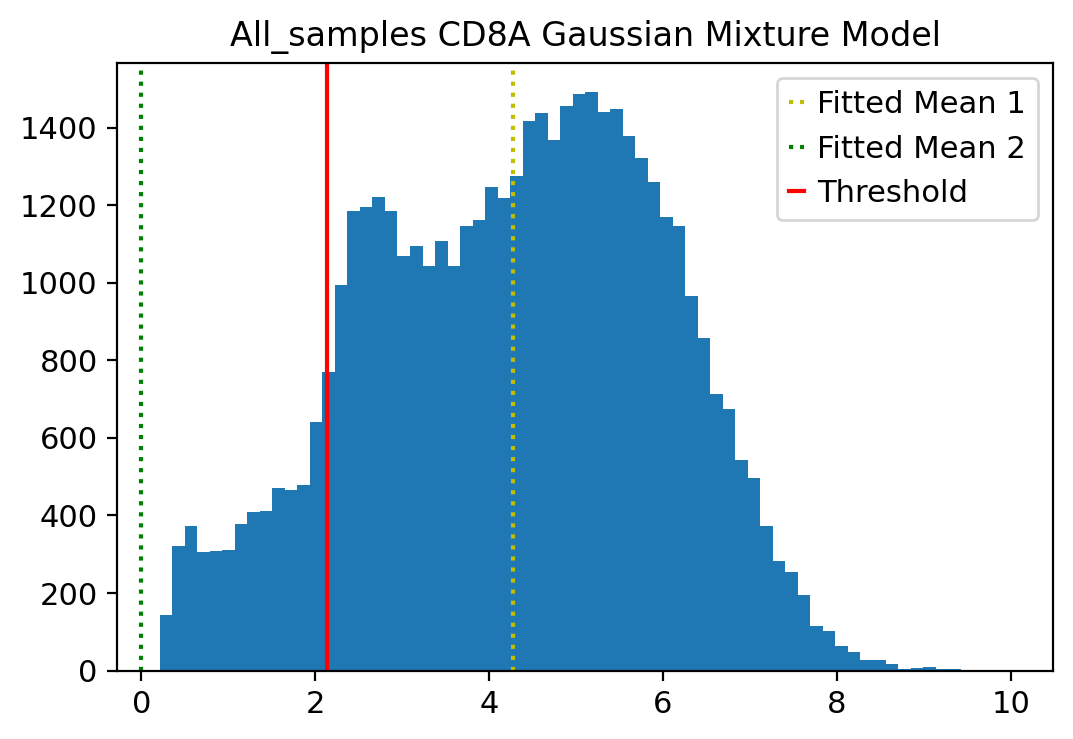

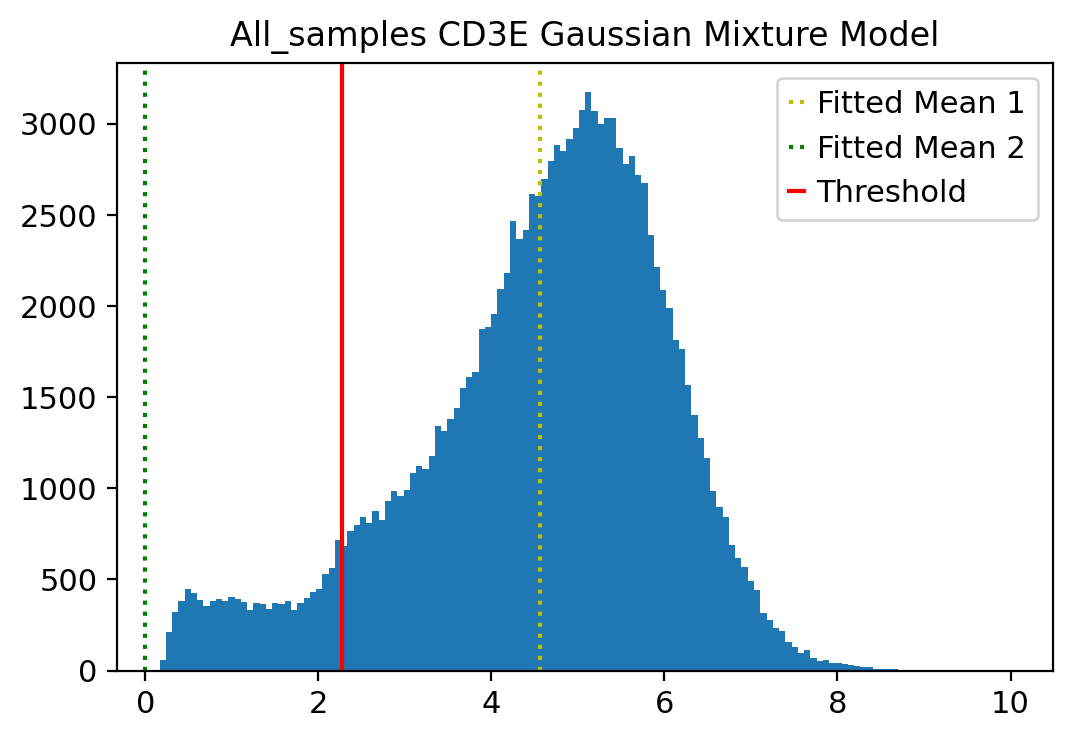

In [65]:
Factors = ['CD8A','CD3E']
adata.obs['Tcell_factors'] = 'Type_'
for f in Factors:
    delta, var, cut_off,up_bound,low_bound= sc_pipe.Thrshold_by_Gaussian_with_plot(adata, f,out_path, 'All_samples', sparse = True)
    data = adata[:, f].X.A
    data =  np.interp(data, (data.min(), data.max()), (0, 10))
    adata.obs[f+'_binary'] = np.where(data > cut_off, f+'+', f+'-')
    adata.obs['Tcell_factors'] =adata.obs['Tcell_factors']+'_'+adata.obs[f+'_binary']

In [66]:
adata.obs['Tcell_factors'].value_counts()

Type__CD8A-_CD3E-    228087
Type__CD8A-_CD3E+     83323
Type__CD8A+_CD3E+     37774
Type__CD8A+_CD3E-      3519
Name: Tcell_factors, dtype: int64

In [67]:
adata.obs.loc[adata.obs['Tcell_factors']=='Type__CD8A+_CD3E+','Defined_type']='CD8 T cell'

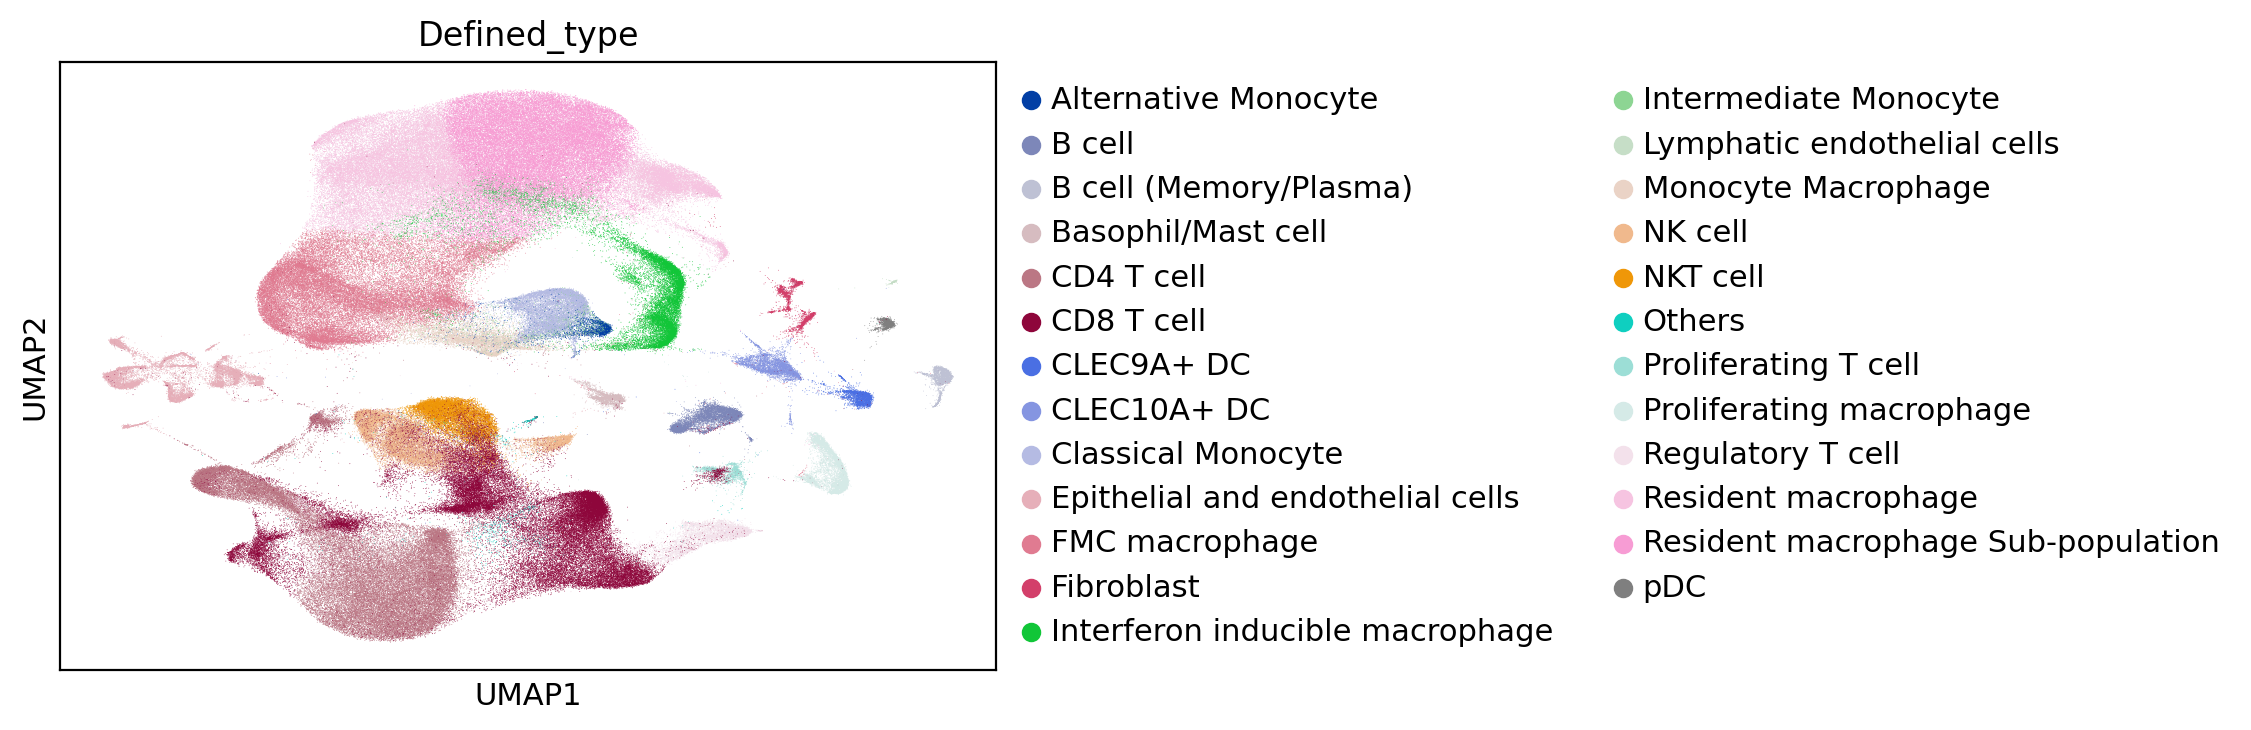

In [68]:
sc.pl.umap(adata,color='Defined_type')

In [69]:
adata.obs['Defined_type'].to_csv('./Defined_type.csv')

In [70]:
adata.write(out_path+'/human_merged_0701.h5ad')

In [71]:

from pyBCS import scanpy2bcs
scanpy2bcs.format_data(out_path+'/human_merged_0701.h5ad', out_path+'/human_merged_0701.bcs',
                        input_format="h5ad", graph_based="leiden")


Writing main/metadata/metalist.json
Cannot convert Sample to numeric, treating as categorical
Cannot convert leiden to numeric, treating as categorical
Cannot convert Cell_Type to numeric, treating as categorical
Cannot convert Monocyte_factors to numeric, treating as categorical
Cannot convert CD14_binary to numeric, treating as categorical
Cannot convert FCGR3A_binary to numeric, treating as categorical
Cannot convert CCR2_binary to numeric, treating as categorical
Cannot convert CX3CR1_binary to numeric, treating as categorical
Cannot convert Defined_type to numeric, treating as categorical
Cannot convert Tcell_factors to numeric, treating as categorical
Cannot convert CD8A_binary to numeric, treating as categorical
Cannot convert CD3E_binary to numeric, treating as categorical
Cannot convert ITGAX_binary to numeric, treating as categorical
Cannot convert Marco to numeric, treating as categorical
Cannot convert MRC1_binary to numeric, treating as categorical
"predicted_doublet" is n

'/user/ifrec/liuyuchen/Analysis_Reports/Akira_Fukusima_scRNASeq/human//human_merged_0701.bcs'

In [ ]:
scv.pp.moments(adata)
scv.tl.recover_dynamics(adata)
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)
scv.tl.score_genes_cell_cycle(adata)
scv.pl.scatter(adata, color_gradients=['S_score', 'G2M_score'], smooth=True, perc=[5, 95])
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])



In [ ]:
adata

In [ ]:
sc.tl.paga(adata, groups='leiden')

In [ ]:
scv.pl.paga(adata, basis='umap')

In [ ]:
scv.pl.velocity_embedding_stream(adata, basis='umap',color = 'leiden')

In [ ]:
del adata.obs['predicted_doublet']
adata.write(out_path+'/human_velocity_integrated_all_sample.h5ad')

In [ ]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80)
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, sortby='latent_time', col_color='leiden', n_convolve=100)
#scv.tl.paga(adata, groups='leiden',use_time_prior='latent_time')
#scv.pl.paga(adata, basis='human_clusters', size=50, alpha=.1, min_edge_width=2, node_size_scale=1.5)

In [ ]:
scv.pl.proportions(adata,groupby='Sample',layers=['ambiguous', 'spliced', 'unspliced'])

In [ ]:
adata.write(out_path+'/human_velocity_integrated_all_sample.h5ad')